In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_results = pd.read_csv('data/results.csv')

In [3]:
df_results.head(40)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [61]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24680 entries, 0 to 24679
Data columns (total 18 columns):
resultId           24680 non-null int64
raceId             24680 non-null int64
driverId           24680 non-null int64
constructorId      24680 non-null int64
number             24680 non-null object
grid               24680 non-null int64
position           24680 non-null object
positionText       24680 non-null object
positionOrder      24680 non-null int64
points             24680 non-null float64
laps               24680 non-null int64
time               24680 non-null object
milliseconds       24680 non-null object
fastestLap         24680 non-null object
rank               24680 non-null object
fastestLapTime     24680 non-null object
fastestLapSpeed    24680 non-null object
statusId           24680 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usage: 3.4+ MB


In [4]:
col_ss = ['raceId', 'driverId', 'grid', 'positionOrder']
lap_ss = ['raceId', 'driverId', 'positionOrder', 'rank']

In [5]:
df_pole = df_results[col_ss].copy()
df_rank = df_results[lap_ss]

In [6]:
df_pole['start_to_finish'] = df_pole['grid'] - df_pole['positionOrder']
df_pole
# Where positive numbers are considered gains in position and a better performance and negative numbers are a loss in position from starting


,raceId,driverId,grid,positionOrder,start_to_finish
0,18,1,1,1,0
1,18,2,5,2,3
2,18,3,7,3,4
3,18,4,11,4,7
4,18,5,3,5,-2
5,18,6,13,6,7
6,18,7,17,7,10
7,18,8,15,8,7
8,18,9,2,9,-7
9,18,10,18,10,8


In [14]:
# Mask for pole position only
top_qual = 1
mask_threshold = df_pole['grid'] == 1
df_top_grid = df_pole[mask_threshold]
df_top_grid
# H0: Having the pole position does not increase your probability of winning the race or a podium finish
# Ha: Having the pole position does increase your probability of winning the race or a podium finish

,raceId,driverId,grid,positionOrder,start_to_finish
0,18,1,1,1,0
40,19,13,1,19,-18
46,20,9,1,3,-2
66,21,8,1,1,0
88,22,13,1,1,0
110,23,13,1,3,-2
146,24,1,1,19,-18
149,25,8,1,2,-1
172,26,5,1,5,-4
188,27,1,1,1,0


In [50]:
finish_count = df_top_grid['positionOrder'].value_counts()
# This shows a very high likelihood that having a pole position would increase your chance of a podium finish or win
finish_count = finish_count.sort_index(0)

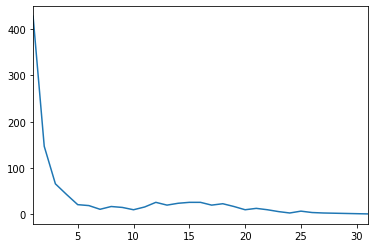

In [57]:
fig, ax = plt.subplots()
finish_count.plot()

In [13]:
df_not_top = df_pole[~mask_threshold]
df_not_top

,raceId,driverId,grid,positionOrder,start_to_finish
1,18,2,5,2,3
2,18,3,7,3,4
3,18,4,11,4,7
4,18,5,3,5,-2
5,18,6,13,6,7
6,18,7,17,7,10
7,18,8,15,8,7
8,18,9,2,9,-7
9,18,10,18,10,8
10,18,11,19,11,8


In [53]:
not_pole_finish_count = df_not_top['positionOrder'].value_counts()
# This shows a very high likelihood that having a pole position would increase your chance of a podium finish or win
not_pole_finish_count = not_pole_finish_count.sort_index(0)
not_pole_finish_count

1      596
2      883
3      965
4      988
5     1007
6     1009
7     1017
8     1011
9     1012
10    1016
11    1013
12    1000
13    1002
14     994
15     990
16     977
17     976
18     958
19     941
20     933
21     732
22     706
23     499
24     475
25     379
26     345
27     267
28     221
29     180
30     156
31     116
32      79
33      65
34      46
35      29
36      18
37      17
38      17
39      13
Name: positionOrder, dtype: int64

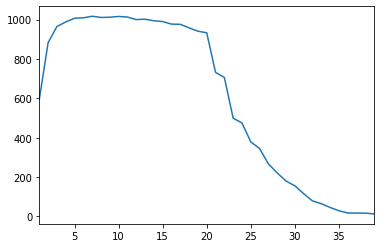

In [56]:
fig, ax = plt.subplots()
not_pole_finish_count.plot()

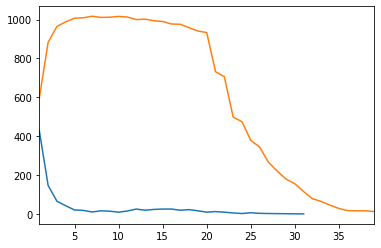

In [58]:
fig, ax = plt.subplots()
finish_count.plot()
not_pole_finish_count.plot()
# Need to analyze how each grid position fares

In [73]:
masking_threshold = df_not_top['grid'] == 2
grid_2 = df_not_top[masking_threshold]
grid_2 = grid_2['positionOrder'].value_counts().sort_index()

In [85]:
masking_threshold = df_not_top['grid'] == 3
grid_3 = df_not_top[masking_threshold]
grid_3 = grid_3['positionOrder'].value_counts().sort_index()


In [86]:
masking_threshold = df_not_top['grid'] == 4
grid_4 = df_not_top[masking_threshold]
grid_4 = grid_4['positionOrder'].value_counts().sort_index()

In [94]:
masking_threshold = df_not_top['grid'] == 5
grid_5 = df_not_top[masking_threshold]
grid_5 = grid_5['positionOrder'].value_counts().sort_index()

In [105]:
masking_threshold = df_not_top['grid'] == 6
grid_6 = df_not_top[masking_threshold]
grid_6 = grid_6['positionOrder'].value_counts().sort_index()

In [106]:
masking_threshold = df_not_top['grid'] == 7
grid_7 = df_not_top[masking_threshold]
grid_7 = grid_7['positionOrder'].value_counts().sort_index()

In [107]:
masking_threshold = df_not_top['grid'] == 8
grid_8 = df_not_top[masking_threshold]
grid_8 = grid_8['positionOrder'].value_counts().sort_index()

In [108]:
masking_threshold = df_not_top['grid'] == 9
grid_9 = df_not_top[masking_threshold]
grid_9 = grid_9['positionOrder'].value_counts().sort_index()

In [109]:
masking_threshold = df_not_top['grid'] == 10
grid_10 = df_not_top[masking_threshold]
grid_10 = grid_10['positionOrder'].value_counts().sort_index()

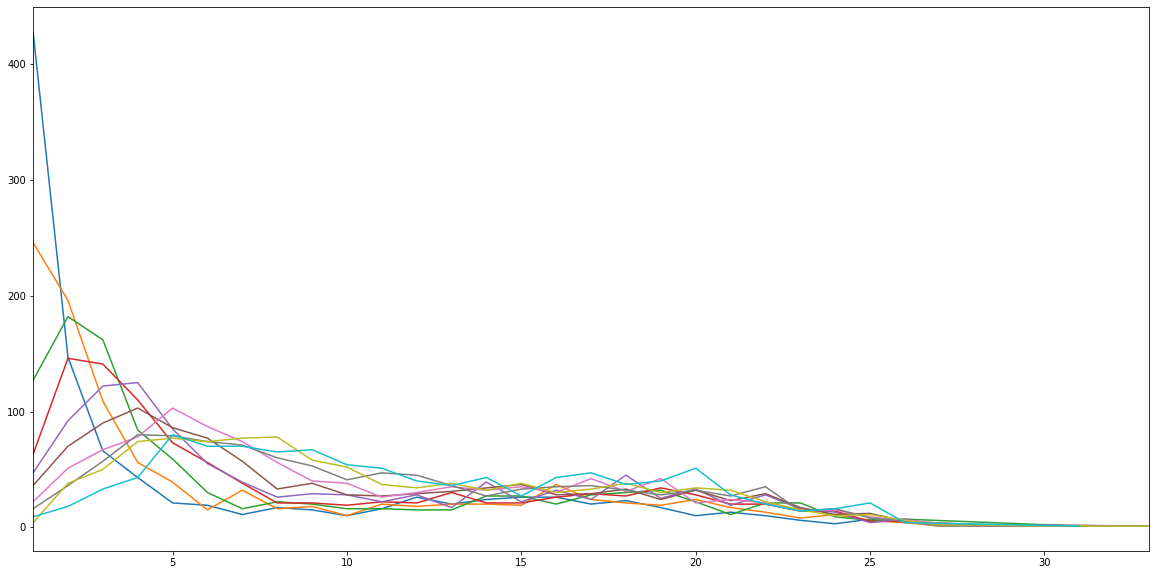

In [115]:
# fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
finish_count.plot()
grid_2.plot()
grid_3.plot()
grid_4.plot()
grid_5.plot()
grid_6.plot()
grid_7.plot()
grid_8.plot()
grid_9.plot()
grid_10.plot();



In [9]:
df_rank


,raceId,driverId,positionOrder,rank
0,18,1,1,2
1,18,2,2,3
2,18,3,3,5
3,18,4,4,7
4,18,5,5,1
5,18,6,6,14
6,18,7,7,12
7,18,8,8,4
8,18,9,9,9
9,18,10,10,13
